In [1]:
from skimage.transform import resize


import random

from tqdm import tqdm
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os
import warnings
warnings.filterwarnings('ignore')

pathleri ayarlarsın

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
path = "../content/drive/MyDrive/Colab Notebooks/"

In [11]:
files = os.listdir(path + "eklenecek görüntüler")

In [12]:
img_list = []

for i in files[0:20]:
    image = cv2.imread(path + "eklenecek görüntüler/" + i)
    image = cv2.resize(src=image, dsize=(400,400))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_list.append(image)

len(img_list)

5

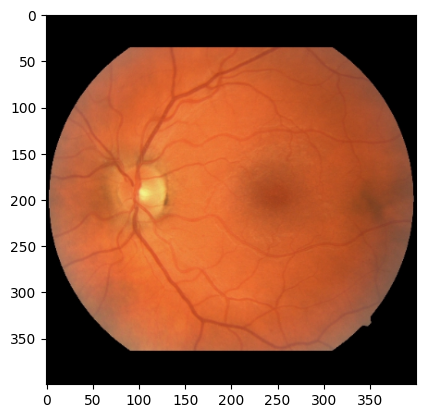

In [13]:
plt.imshow(img_list[2]);

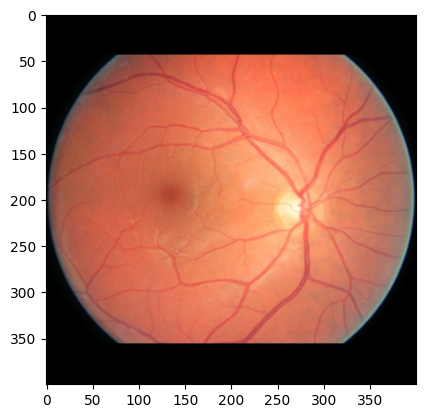

In [14]:
plt.imshow(img_list[4]);

In [15]:
img_list[4].shape

(400, 400, 3)

(400, 400)

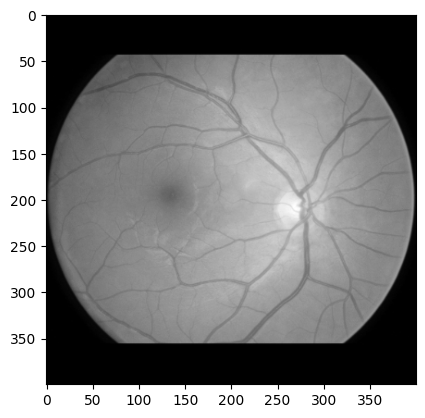

In [16]:
img = cv2.cvtColor(img_list[4].copy(), cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap='gray');
img.shape

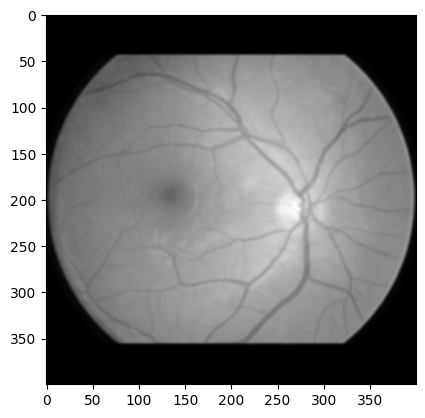

In [17]:
blur = cv2.GaussianBlur(src=img, ksize=(5,5), sigmaX=0)
plt.imshow(blur, cmap='gray');

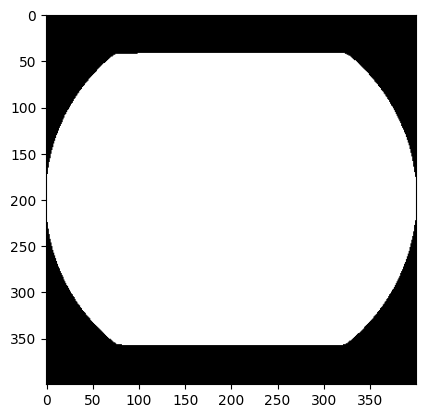

In [18]:
thres = cv2.threshold(blur,10 ,255, cv2.THRESH_BINARY)[1]
plt.imshow(thres, cmap='gray');

In [19]:
contour = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0][0]

contour

array([[[ 99,  42]],

       [[ 98,  43]],

       [[ 75,  43]],

       [[ 74,  44]],

       [[ 73,  44]],

       [[ 71,  46]],

       [[ 70,  46]],

       [[ 63,  53]],

       [[ 62,  53]],

       [[ 55,  60]],

       [[ 55,  61]],

       [[ 46,  70]],

       [[ 46,  71]],

       [[ 42,  75]],

       [[ 42,  76]],

       [[ 39,  79]],

       [[ 39,  80]],

       [[ 36,  83]],

       [[ 36,  84]],

       [[ 34,  86]],

       [[ 34,  87]],

       [[ 32,  89]],

       [[ 32,  90]],

       [[ 30,  92]],

       [[ 30,  93]],

       [[ 29,  94]],

       [[ 29,  95]],

       [[ 27,  97]],

       [[ 27,  98]],

       [[ 26,  99]],

       [[ 26, 100]],

       [[ 25, 101]],

       [[ 25, 102]],

       [[ 23, 104]],

       [[ 23, 105]],

       [[ 22, 106]],

       [[ 22, 107]],

       [[ 20, 109]],

       [[ 20, 111]],

       [[ 19, 112]],

       [[ 19, 113]],

       [[ 18, 114]],

       [[ 18, 116]],

       [[ 17, 117]],

       [[ 17, 118]],

       [[ 

In [20]:
contour.shape

(314, 1, 2)

In [21]:
contour = contour[:,0,:]
contour.shape

(314, 2)

In [22]:
contour

array([[ 99,  42],
       [ 98,  43],
       [ 75,  43],
       [ 74,  44],
       [ 73,  44],
       [ 71,  46],
       [ 70,  46],
       [ 63,  53],
       [ 62,  53],
       [ 55,  60],
       [ 55,  61],
       [ 46,  70],
       [ 46,  71],
       [ 42,  75],
       [ 42,  76],
       [ 39,  79],
       [ 39,  80],
       [ 36,  83],
       [ 36,  84],
       [ 34,  86],
       [ 34,  87],
       [ 32,  89],
       [ 32,  90],
       [ 30,  92],
       [ 30,  93],
       [ 29,  94],
       [ 29,  95],
       [ 27,  97],
       [ 27,  98],
       [ 26,  99],
       [ 26, 100],
       [ 25, 101],
       [ 25, 102],
       [ 23, 104],
       [ 23, 105],
       [ 22, 106],
       [ 22, 107],
       [ 20, 109],
       [ 20, 111],
       [ 19, 112],
       [ 19, 113],
       [ 18, 114],
       [ 18, 116],
       [ 17, 117],
       [ 17, 118],
       [ 16, 119],
       [ 16, 120],
       [ 15, 121],
       [ 15, 122],
       [ 14, 123],
       [ 14, 125],
       [ 13, 126],
       [ 13,

In [23]:
contour[:,0].argmax() # max. index

233

In [24]:
contour[233] # max value

array([399, 222], dtype=int32)

In [25]:
contour[:,0].argmin() # min index

77

In [26]:
contour[77] # min value

array([  0, 179], dtype=int32)

In [27]:
left = tuple(contour[contour[:,0].argmin()])
right = tuple(contour[contour[:,0].argmax()])
top = tuple(contour[contour[:,1].argmin()])
bottom = tuple(contour[contour[:,1].argmax()])

print(f"left: {left}\nright: {right}\ntop: {top}\nbottom: {bottom}\n")

left: (0, 179)
right: (399, 222)
top: (99, 42)
bottom: (82, 357)



In [28]:
x1 = left[0]
y1 = top[1]
x2 = right[0]
y2 = bottom[1]

print(f"left[0]: {x1}\ntop[1]: {y1}\nright[0]: {x2}\nbottom[1]: {y2}\n")

left[0]: 0
top[1]: 42
right[0]: 399
bottom[1]: 357



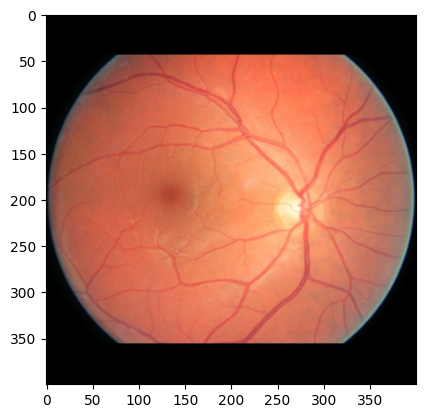

In [29]:
orj_img = img_list[4].copy()
plt.imshow(orj_img);

shape:  (315, 399, 3)


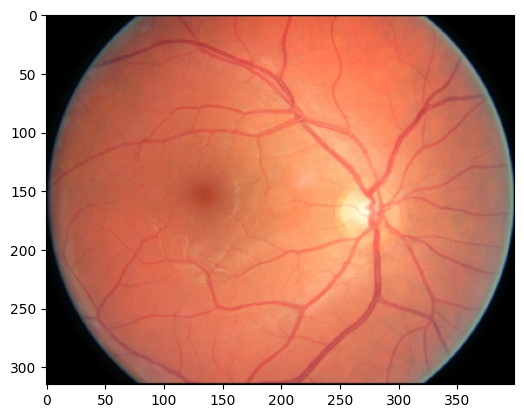

In [30]:
crop_img = orj_img[y1:y2, x1:x2]
plt.imshow(crop_img);
print("shape: ",crop_img.shape)

shape:  (400, 400, 3)


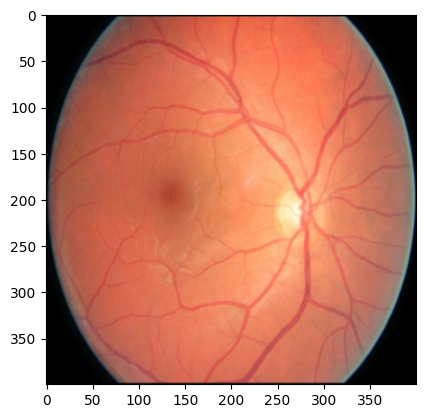

In [31]:
crop_img = cv2.resize(crop_img, (400,400))
plt.imshow(crop_img);
print("shape: ",crop_img.shape)

In [32]:
x = int(x2-x1)*4//100
y = int(y2-y1)*5//100

print(x,y)

15 15


shape:  (285, 369, 3)


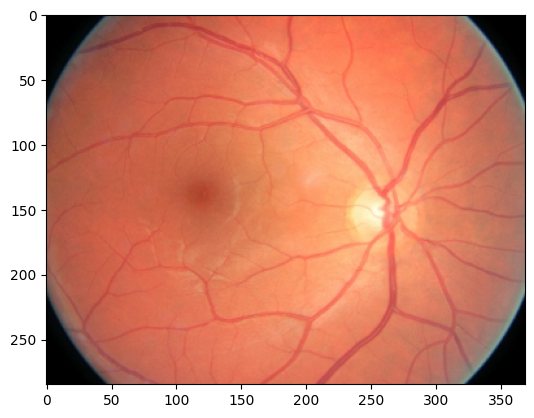

In [33]:
crop_img = orj_img[y1+y:y2-y, x1+x:x2-x]
plt.imshow(crop_img);
print("shape: ",crop_img.shape)

shape:  (400, 400, 3)


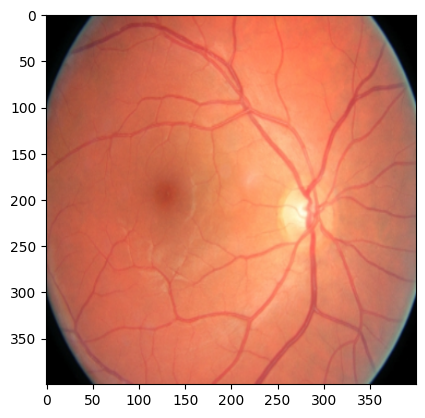

In [34]:
crop_img = cv2.resize(crop_img, (400,400))
plt.imshow(crop_img);
print("shape: ",crop_img.shape)

In [35]:
lab = cv2.cvtColor(crop_img, cv2.COLOR_RGB2LAB)

lab.shape

(400, 400, 3)

In [36]:
l, a, b = cv2.split(lab)

shape:  (400, 400)


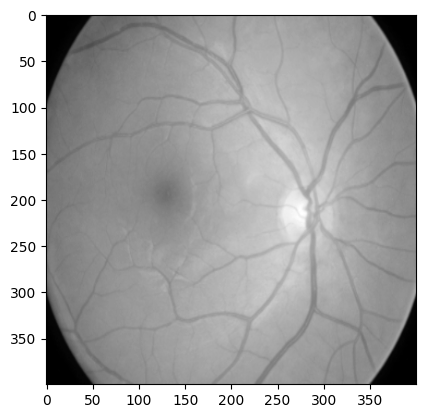

In [37]:
plt.imshow(l, cmap="gray");
print("shape: ", l.shape) # 2D

In [38]:
flatten = l.flatten()

flatten.shape

(160000,)

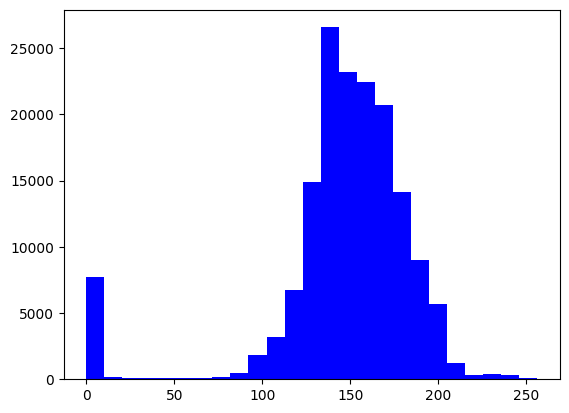

In [39]:
plt.hist(flatten, 25, [0,256], color="b")
plt.show()

In [40]:
clahe = cv2.createCLAHE(clipLimit=7.0, tileGridSize=((8,8)))

cl = clahe.apply(l)

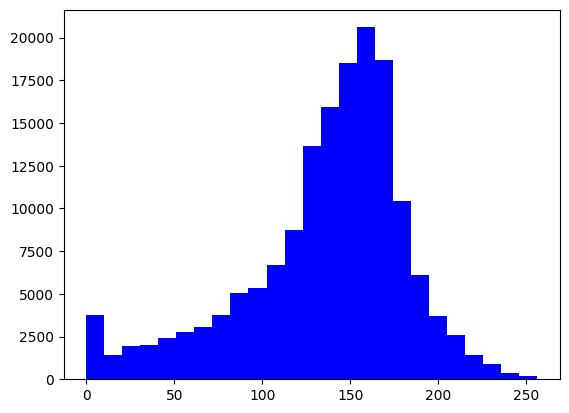

In [41]:
plt.hist(cl.flatten(), 25, [0,256], color="b")
plt.show()

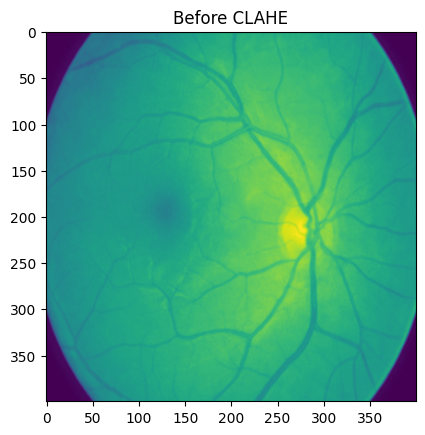

In [42]:
plt.title("Before CLAHE")
plt.imshow(l);

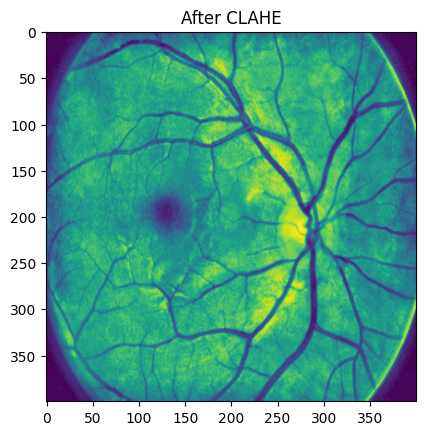

In [43]:
plt.title("After CLAHE")
plt.imshow(cl);

In [44]:
merge = cv2.merge((cl, a, b))

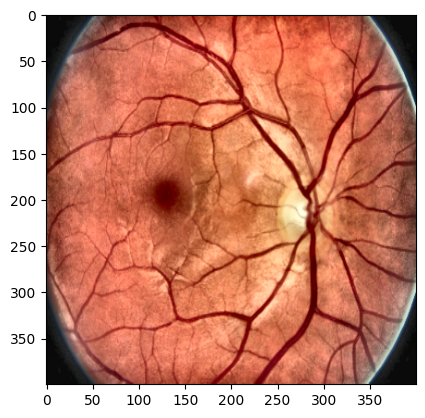

In [45]:
final_img = cv2.cvtColor(merge, cv2.COLOR_LAB2RGB)

plt.imshow(final_img);

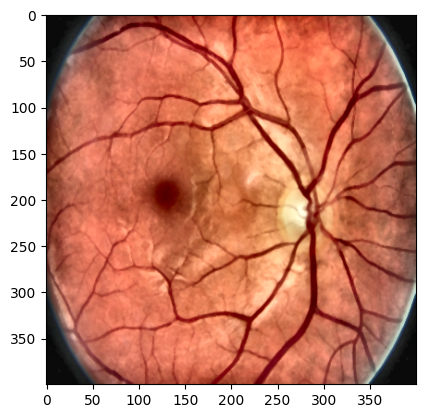

In [46]:
med_blur = cv2.medianBlur(final_img, ksize=3)

plt.imshow(med_blur);

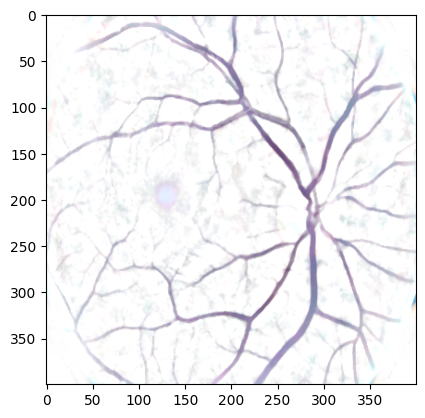

In [47]:
back_ground = cv2.medianBlur(final_img, ksize=35)

mask = cv2.addWeighted(med_blur, 1, back_ground, -1, 255)

plt.imshow(mask);

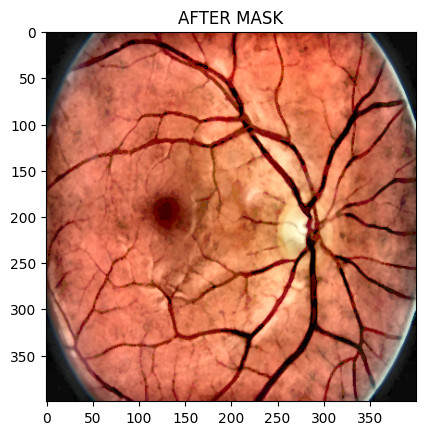

In [48]:
final_mask = cv2.bitwise_and(mask, med_blur)

plt.title("AFTER MASK")
plt.imshow(final_mask);

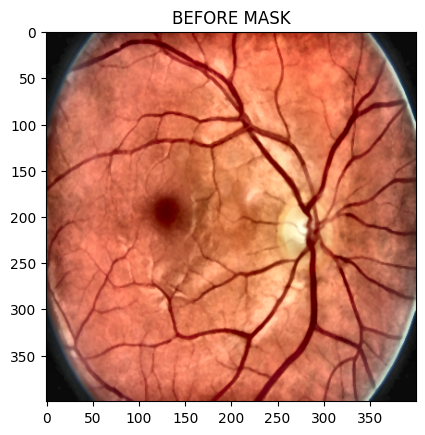

In [49]:
plt.title("BEFORE MASK")
plt.imshow(med_blur);

bu da hepsinin olduğu script

In [ ]:
from tqdm import tqdm_notebook as tqdm

path = "../content/train_images_512/"
files = os.listdir(path + "train_images_512/")


def preprocessing(files):
    """
    This function returns images prepared for training
    """
    img_list = []
    for i in tqdm(files):
        image = cv2.imread(path + 'train_images_512/' + i)
        image = cv2.resize(image, (240, 240))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        copy = image.copy()
        copy = cv2.cvtColor(copy, cv2.COLOR_RGB2GRAY)
        blur = cv2.GaussianBlur(copy, (5, 5), 0)

        thresh = cv2.threshold(blur, 10, 255, cv2.THRESH_BINARY)[1]

        # CONTOUR DETECTION
        contour = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contour = contour[0][0]
        contour = contour[:, 0, :]

        # GET COORDINATES
        x1 = tuple(contour[contour[:, 0].argmin()])[0]
        y1 = tuple(contour[contour[:, 1].argmin()])[1]
        x2 = tuple(contour[contour[:, 0].argmax()])[0]
        y2 = tuple(contour[contour[:, 1].argmax()])[1]

        #Crop Images Again to Destroy Black Area
        x = int(x2 - x1) * 4 // 50
        y = int(y2 - y1) * 5 // 50

        # THRES FOR CROPPED IMAGES
        copy2 = image.copy()
        if x2 - x1 > 100 and y2 - y1 > 100:
            copy2 = copy2[y1 + y: y2 - y, x1 + x: x2 - x]
            copy2 = cv2.resize(copy2, (240, 240))

        # LAB
        lab = cv2.cvtColor(copy2, cv2.COLOR_RGB2LAB)
        l, a, b = cv2.split(lab)

        # CLAHE - Contrast-Limited Adaptive Histogram Equalization
        clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=((8, 8)))
        cl = clahe.apply(l)

        # MERGING LAB
        merge = cv2.merge((cl, a, b))
        final_img = cv2.cvtColor(merge, cv2.COLOR_LAB2RGB)
        med_blur = cv2.medianBlur(final_img, 3)
        back_gorund = cv2.medianBlur(final_img, 37)

        # MASK FOR BLEEDING VEIN
        mask = cv2.addWeighted(med_blur, 1, back_gorund, -1, 255)
        final = cv2.bitwise_and(mask, med_blur)
        img_list.append(final)

    return img_list


img_list = preprocessing(files=files)